In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [69]:
df = pd.read_csv('data.csv')
df

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [70]:
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [71]:
df.tail()

,SAT,GPA
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76
83,2050,3.81


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [73]:
df.dropna(inplace= True)

In [74]:
df.drop_duplicates(inplace=True)

In [75]:
df.shape

(83, 2)

In [76]:
df.describe()

,SAT,GPA
count,83.000000,83.000000
mean,1846.253012,3.334217
std,104.777795,0.270794
min,1634.000000,2.400000
25%,1774.000000,3.195000
50%,1849.000000,3.380000
75%,1934.000000,3.505000
max,2050.000000,3.810000


In [77]:
df.isnull().sum()

SAT    0
GPA    0
dtype: int64

In [78]:
X = df.drop(columns= 'GPA')
Y = df['GPA']

In [79]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2, random_state= 2)

Overfitting

In [80]:
model = DecisionTreeRegressor(max_depth = 4)
model.fit(xtrain,ytrain)
y_pred= model.predict(xtest)
y_pred

array([3.56714286, 3.065     , 3.01      , 3.065     , 3.56714286,
       3.76      , 3.56714286, 3.56714286, 3.34333333, 3.44272727,
       3.56714286, 3.37      , 3.34333333, 3.21333333, 3.56714286,
       3.34909091, 3.34909091])

In [81]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,y_pred)

0.061005542216886754

[Text(0.49107142857142855, 0.9, 'x[0] <= 1797.0\nsquared_error = 0.068\nsamples = 66\nvalue = 3.335'),
 Text(0.26785714285714285, 0.7, 'x[0] <= 1766.5\nsquared_error = 0.065\nsamples = 24\nvalue = 3.114'),
 Text(0.14285714285714285, 0.5, 'x[0] <= 1663.5\nsquared_error = 0.074\nsamples = 17\nvalue = 3.062'),
 Text(0.07142857142857142, 0.3, 'x[0] <= 1648.5\nsquared_error = 0.012\nsamples = 2\nvalue = 3.31'),
 Text(0.03571428571428571, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 3.42'),
 Text(0.10714285714285714, 0.1, 'squared_error = -0.0\nsamples = 1\nvalue = 3.2'),
 Text(0.21428571428571427, 0.3, 'x[0] <= 1667.0\nsquared_error = 0.073\nsamples = 15\nvalue = 3.029'),
 Text(0.17857142857142858, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 2.52'),
 Text(0.25, 0.1, 'squared_error = 0.058\nsamples = 14\nvalue = 3.065'),
 Text(0.39285714285714285, 0.5, 'x[0] <= 1789.0\nsquared_error = 0.023\nsamples = 7\nvalue = 3.24'),
 Text(0.35714285714285715, 0.3, 'x[0] <= 1776.0\nsquared_error = 

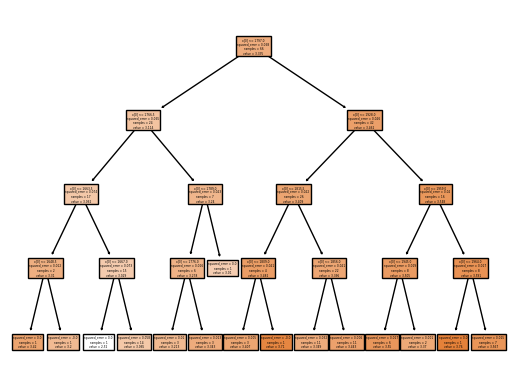

In [82]:
from sklearn import tree
tree.plot_tree(model, filled= True)

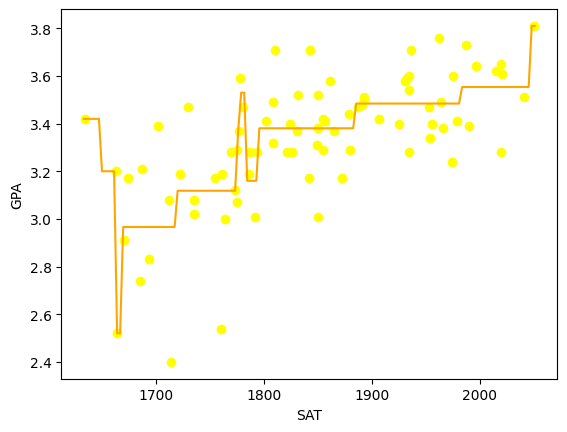

In [83]:
X= np.array(df.drop(columns= 'GPA'))
Y = np.array(df['GPA'])

model.fit(X, Y)

x_min , x_max = X[:,0].min()-1, X[:,0].max()+1
xx = np.linspace(x_min, x_max, 150).reshape(-1,1)

y_pred = model.predict(xx)

plt.scatter(X[:,0], Y, color='yellow')
plt.plot(xx,y_pred,color='orange')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

UnderFitting

In [84]:
model = DecisionTreeRegressor(max_depth= 2)
model.fit(xtrain,ytrain)
y_pred= model.predict(xtest)
y_pred

array([3.548125  , 3.06176471, 3.24      , 3.06176471, 3.548125  ,
       3.548125  , 3.548125  , 3.548125  , 3.24      , 3.40923077,
       3.548125  , 3.548125  , 3.24      , 3.24      , 3.548125  ,
       3.40923077, 3.40923077])

In [85]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,y_pred)

0.05362357184010658

[Text(0.5, 0.8333333333333334, 'x[0] <= 1797.0\nsquared_error = 0.068\nsamples = 66\nvalue = 3.335'),
 Text(0.25, 0.5, 'x[0] <= 1766.5\nsquared_error = 0.065\nsamples = 24\nvalue = 3.114'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.074\nsamples = 17\nvalue = 3.062'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.023\nsamples = 7\nvalue = 3.24'),
 Text(0.75, 0.5, 'x[0] <= 1928.0\nsquared_error = 0.026\nsamples = 42\nvalue = 3.462'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.022\nsamples = 26\nvalue = 3.409'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.02\nsamples = 16\nvalue = 3.548')]

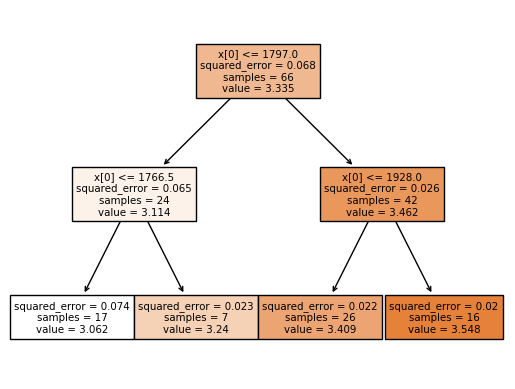

In [86]:
from sklearn import tree
tree.plot_tree(model, filled= True)

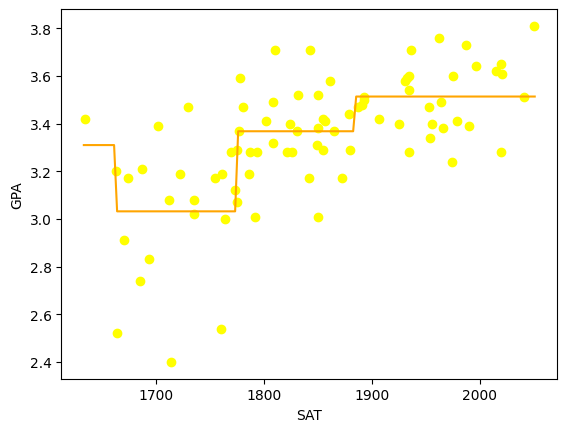

In [87]:
X= np.array(df.drop(columns= 'GPA'))
Y = np.array(df['GPA'])

model.fit(X, Y)
inp = np.array([1962])

x_min , x_max = X[:,0].min()-1, X[:,0].max()+1
xx = np.linspace(x_min, x_max, 150).reshape(-1,1)

y_pred = model.predict(xx)

plt.scatter(X[:,0], Y, color='yellow')
plt.plot(xx,y_pred,color='orange')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()